#**Sentiment Analysis**

Data Loading and Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

Load the data

In [12]:
twitter_data = pd.read_csv('/content/Twitter_Data.csv')

In [9]:
apps = pd.read_csv('/content/apps.csv')

In [11]:
user_reviews = pd.read_csv('/content/user_reviews.csv')

Inspect the data

In [4]:
print(twitter_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  16089 non-null  object 
 1   category    16089 non-null  float64
dtypes: float64(1), object(1)
memory usage: 251.5+ KB
None


In [13]:
print(twitter_data.describe())

            category
count  123310.000000
mean        0.228003
std         0.780382
min        -1.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


In [14]:
print(twitter_data.dtypes)

clean_text     object
category      float64
dtype: object


In [15]:
print(twitter_data.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [16]:
print(twitter_data.tail())

                                               clean_text  category
123306  modi sarkar has brought profound changes almos...       1.0
123307  why modi silent china toi editorials confront ...       0.0
123308  raga tried vry hard rafale the bludgeon accusa...      -1.0
123309  the first the world honble modi adopted villag...       1.0
123310  imagine saying rahul went china find out the d...       NaN


In [17]:
print(twitter_data.isnull())

        clean_text  category
0            False     False
1            False     False
2            False     False
3            False     False
4            False     False
...            ...       ...
123306       False     False
123307       False     False
123308       False     False
123309       False     False
123310       False      True

[123311 rows x 2 columns]


In [18]:
print(twitter_data.isnull().sum())

clean_text    1
category      1
dtype: int64


In [19]:
print(twitter_data.isnull().sum().sum())

2


In [20]:
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB
None


In [21]:
print(apps.describe())

         Unnamed: 0       Rating       Reviews
count   9659.000000  8196.000000  9.659000e+03
mean    5666.172896     4.173243  2.165926e+05
std     3102.362863     0.536625  1.831320e+06
min        0.000000     1.000000  0.000000e+00
25%     3111.500000     4.000000  2.500000e+01
50%     5814.000000     4.300000  9.670000e+02
75%     8327.500000     4.500000  2.940100e+04
max    10840.000000     5.000000  7.815831e+07


In [22]:
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [23]:
print(apps.head())

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

In [24]:
print(apps.tail())

      Unnamed: 0                                            App  \
9654       10836                               Sya9a Maroc - FR   
9655       10837               Fr. Mike Schmitz Audio Teachings   
9656       10838                         Parkinson Exercices FR   
9657       10839                  The SCP Foundation DB fr nn5n   
9658       10840  iHoroscope - 2018 Daily Horoscope & Astrology   

                 Category  Rating  Reviews  Size     Installs  Type Price  \
9654               FAMILY     4.5       38   53M       5,000+  Free     0   
9655               FAMILY     5.0        4  3.6M         100+  Free     0   
9656              MEDICAL     NaN        3  9.5M       1,000+  Free     0   
9657  BOOKS_AND_REFERENCE     4.5      114   NaN       1,000+  Free     0   
9658            LIFESTYLE     4.5   398307   19M  10,000,000+  Free     0   

     Content Rating             Genres      Last Updated         Current Ver  \
9654       Everyone          Education     July 25, 20

In [25]:
print(apps.isnull())

      Unnamed: 0    App  Category  Rating  Reviews   Size  Installs   Type  \
0          False  False     False   False    False  False     False  False   
1          False  False     False   False    False  False     False  False   
2          False  False     False   False    False  False     False  False   
3          False  False     False   False    False  False     False  False   
4          False  False     False   False    False  False     False  False   
...          ...    ...       ...     ...      ...    ...       ...    ...   
9654       False  False     False   False    False  False     False  False   
9655       False  False     False   False    False  False     False  False   
9656       False  False     False    True    False  False     False  False   
9657       False  False     False   False    False   True     False  False   
9658       False  False     False   False    False  False     False  False   

      Price  Content Rating  Genres  Last Updated  Current Ver 

In [26]:
print(apps.isnull().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [27]:
print(apps.isnull().sum().sum())

2701


In [28]:
print(user_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34965 entries, 0 to 34964
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     34965 non-null  object 
 1   Translated_Review       20375 non-null  object 
 2   Sentiment               20378 non-null  object 
 3   Sentiment_Polarity      20378 non-null  float64
 4   Sentiment_Subjectivity  20378 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB
None


In [29]:
print(user_reviews.describe())

       Sentiment_Polarity  Sentiment_Subjectivity
count        20378.000000            20378.000000
mean             0.182017                0.493597
std              0.350535                0.256685
min             -1.000000                0.000000
25%              0.000000                0.358940
50%              0.150000                0.516667
75%              0.400000                0.650000
max              1.000000                1.000000


In [30]:
print(user_reviews.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [31]:
print(user_reviews.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


In [32]:
print(user_reviews.tail())

                                App  \
34960  DisneyNOW – TV Shows & Games   
34961  DisneyNOW – TV Shows & Games   
34962  DisneyNOW – TV Shows & Games   
34963  DisneyNOW – TV Shows & Games   
34964  DisneyNOW – TV Shows & Games   

                                       Translated_Review Sentiment  \
34960  It's great except I complaint: Most episodes l...  Positive   
34961  used work great. Then started would open would...  Positive   
34962  This stupid. It's always freezing internet. It...  Negative   
34963  It working perfectly fine day I got next day I...  Positive   
34964  Ok first alls let whach 7 episodes says that's...       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
34960            0.333333                0.483333  
34961            0.018750                0.541667  
34962           -0.183333                0.444444  
34963            0.144167                0.260000  
34964                 NaN                     NaN  


In [33]:
print(user_reviews.isnull())

         App  Translated_Review  Sentiment  Sentiment_Polarity  \
0      False              False      False               False   
1      False              False      False               False   
2      False               True       True                True   
3      False              False      False               False   
4      False              False      False               False   
...      ...                ...        ...                 ...   
34960  False              False      False               False   
34961  False              False      False               False   
34962  False              False      False               False   
34963  False              False      False               False   
34964  False              False       True                True   

       Sentiment_Subjectivity  
0                       False  
1                       False  
2                        True  
3                       False  
4                       False  
...            

In [34]:
print(user_reviews.isnull().sum())

App                           0
Translated_Review         14590
Sentiment                 14587
Sentiment_Polarity        14587
Sentiment_Subjectivity    14587
dtype: int64


In [35]:
print(user_reviews.isnull().sum().sum())

58351


Data Cleaning

Dropping rows with missing values in Twitter data

In [36]:
twitter_data.dropna(inplace=True)

Filling missing values in user reviews with empty strings or appropriate values

In [37]:
user_reviews['Translated_Review'].fillna('', inplace=True)
user_reviews['Sentiment'].fillna('Neutral', inplace=True)
user_reviews['Sentiment_Polarity'].fillna(0, inplace=True)
user_reviews['Sentiment_Subjectivity'].fillna(0, inplace=True)

Filling missing values in apps dataset with suitable replacements

In [38]:
apps['Rating'].fillna(apps['Rating'].mean(), inplace=True)
apps['Size'].fillna('Varies with device', inplace=True)
apps['Type'].fillna('Free', inplace=True)
apps['Current Ver'].fillna('Unknown', inplace=True)
apps['Android Ver'].fillna('Varies with device', inplace=True)

Verifying if missing values are handled

In [39]:
print(twitter_data.isnull().sum().sum())
print(user_reviews.isnull().sum().sum())
print(apps.isnull().sum().sum())

0
0
0


Exploratory Data Analysis (EDA)

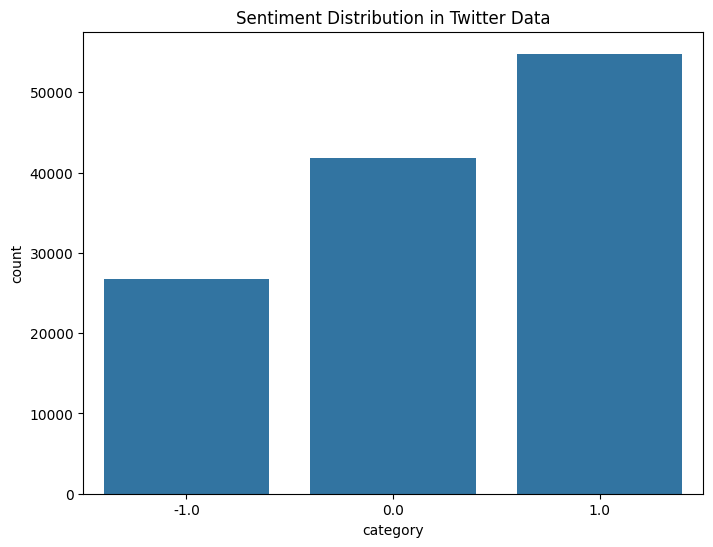

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='category', data=twitter_data)
plt.title('Sentiment Distribution in Twitter Data')
plt.show()

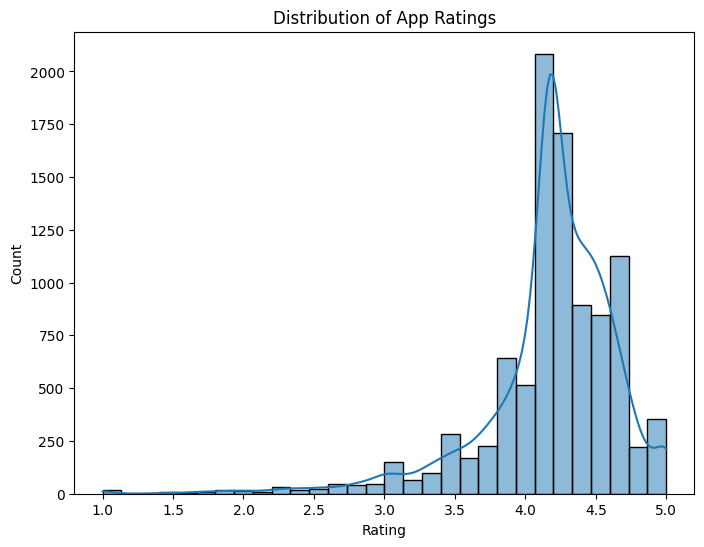

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(apps['Rating'], bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

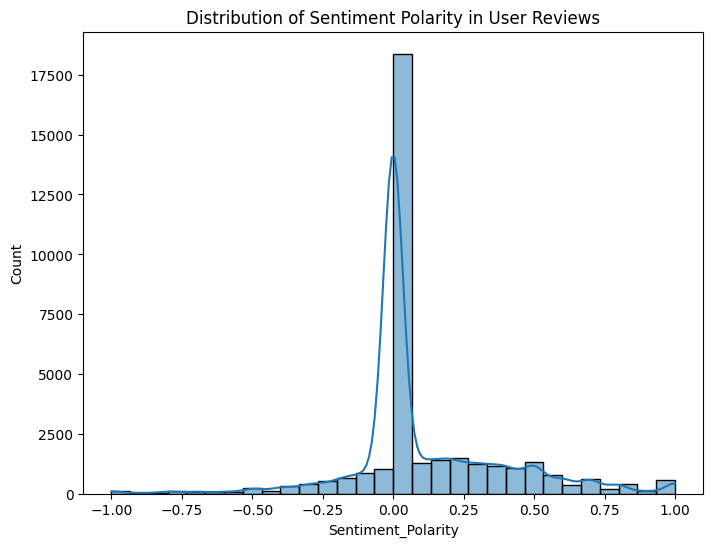

In [42]:
plt.figure(figsize=(8,6))
sns.histplot(user_reviews['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Distribution of Sentiment Polarity in User Reviews')
plt.show()

Feature Engineering

Feature engineering for Twitter data using TF-IDF Vectorizer

In [43]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_twitter = vectorizer.fit_transform(twitter_data['clean_text'])
y_twitter = twitter_data['category']

Splitting the Twitter data into training and testing sets

In [44]:
X_train_twitter, X_test_twitter, y_train_twitter, y_test_twitter = train_test_split(X_twitter, y_twitter, test_size=0.2, random_state=42)

Model Building and Evaluation

Training a Naive Bayes classifier for Twitter sentiment analysis

In [45]:
model_nb = MultinomialNB()
model_nb.fit(X_train_twitter, y_train_twitter)

MultinomialNB()

Making predictions

In [46]:
y_pred_twitter = model_nb.predict(X_test_twitter)

Evaluating the model

In [48]:
print(confusion_matrix(y_test_twitter, y_pred_twitter))

[[ 2406   545  2339]
 [  111  5895  2343]
 [  312   560 10151]]


In [49]:
print(classification_report(y_test_twitter, y_pred_twitter))

              precision    recall  f1-score   support

        -1.0       0.85      0.45      0.59      5290
         0.0       0.84      0.71      0.77      8349
         1.0       0.68      0.92      0.79     11023

    accuracy                           0.75     24662
   macro avg       0.79      0.69      0.72     24662
weighted avg       0.77      0.75      0.74     24662



Data Visualization of Results

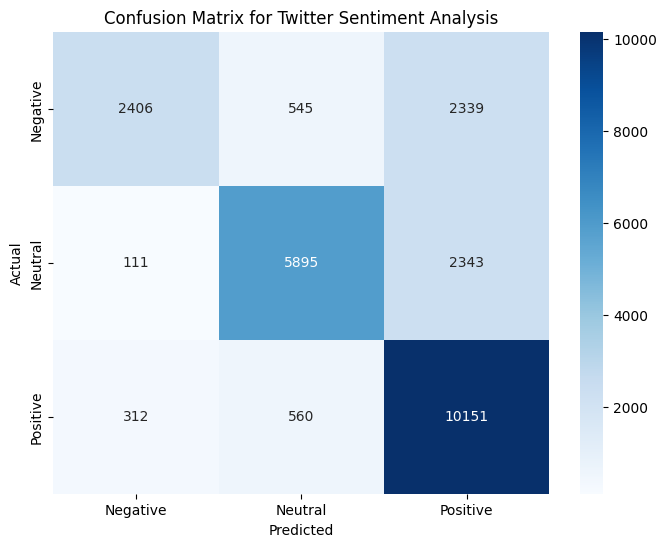

In [50]:
conf_matrix = confusion_matrix(y_test_twitter, y_pred_twitter)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Twitter Sentiment Analysis')
plt.show()

Summary

The code implements a sentiment analysis pipeline for text data, focusing on Twitter data while also inspecting datasets for apps and user reviews. It begins by loading and inspecting the datasets, addressing missing values through various cleaning techniques. Exploratory Data Analysis (EDA) is conducted with visualizations to understand data distributions. Feature engineering is performed using TF-IDF vectorization on the Twitter text data. The sentiment analysis model is built using a Naive Bayes classifier, trained and evaluated with train-test split data. Model performance is assessed through a confusion matrix and classification report, with results visualized in a heatmap for clear interpretation.